In [1]:
import importdata
import MachineLearning as ML
import MLAnalysis as MLA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import time

In [2]:
data = importdata.importdata()
mask_chisq = (data['DCHISQ_DEV']>0) & (data['DCHISQ_EXP']>0)

In [3]:
data.columns.values

array(['RELEASE', 'OBJID', 'TYPE', 'RA', 'DEC', 'RA_IVAR', 'DEC_IVAR',
       'EBV', 'FLUX_U', 'FLUX_G', 'FLUX_R', 'FLUX_I', 'FLUX_Z', 'FLUX_Y',
       'FLUX_W1', 'FLUX_W2', 'FLUX_W3', 'FLUX_W4', 'FLUX_IVAR_U',
       'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_I', 'FLUX_IVAR_Z',
       'FLUX_IVAR_Y', 'FLUX_IVAR_W1', 'FLUX_IVAR_W2', 'FLUX_IVAR_W3',
       'FLUX_IVAR_W4', 'MW_TRANSMISSION_U', 'MW_TRANSMISSION_G',
       'MW_TRANSMISSION_R', 'MW_TRANSMISSION_I', 'MW_TRANSMISSION_Z',
       'MW_TRANSMISSION_Y', 'MW_TRANSMISSION_W1', 'MW_TRANSMISSION_W2',
       'MW_TRANSMISSION_W3', 'MW_TRANSMISSION_W4', 'NOBS_U', 'NOBS_G',
       'NOBS_R', 'NOBS_I', 'NOBS_Z', 'NOBS_Y', 'NOBS_W1', 'NOBS_W2',
       'NOBS_W3', 'NOBS_W4', 'RCHISQ_U', 'RCHISQ_G', 'RCHISQ_R',
       'RCHISQ_I', 'RCHISQ_Z', 'RCHISQ_Y', 'RCHISQ_W1', 'RCHISQ_W2',
       'RCHISQ_W3', 'RCHISQ_W4', 'FRACFLUX_U', 'FRACFLUX_G', 'FRACFLUX_R',
       'FRACFLUX_I', 'FRACFLUX_Z', 'FRACFLUX_Y', 'FRACFLUX_W1',
       'FRACFLUX_W2', 'FRACFLUX_

In [3]:
def predict(input_names, target_name, func=ML.Regressors.RFregressor, data_slice=slice(None)):
    t0 = time.time()
    inputs, target = data[input_names][mask_chisq], data[target_name][mask_chisq]
    reg = ML.Regressors(inputs, target)
    result = func(reg)
    print(f"Running {func.__name__} took {time.time()-t0} seconds")
    return result

Running RFregressor took 86.61230969429016 seconds
Running KNNregressor took 17.332603454589844 seconds
Running KNN_dregressor took 18.050391912460327 seconds


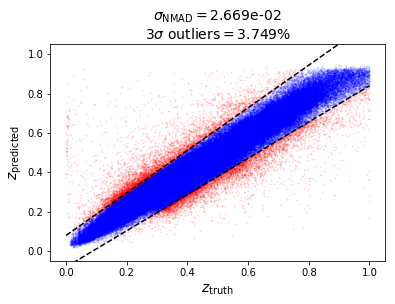

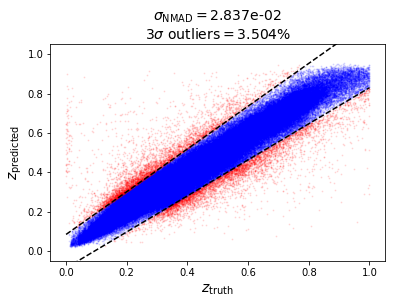

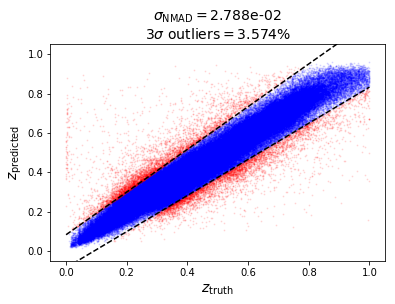

In [13]:
input_names = ["gminr", "rminz", "zminw1", "w1minw2", "gmag", "prob_exp"]
target_name = "redshift"

funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func) for func in funcs]

def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

Running RFregressor took 91.27670764923096 seconds
Running KNNregressor took 18.66594672203064 seconds
Running KNN_dregressor took 18.987586498260498 seconds


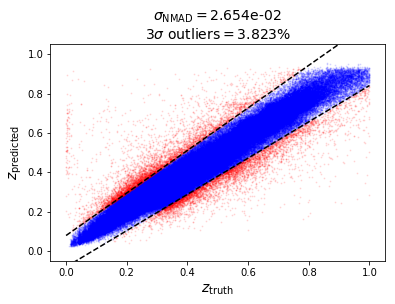

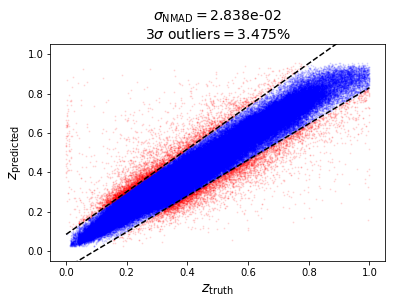

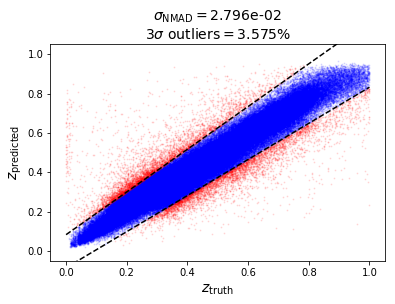

In [11]:
input_names = ["gminr", "rminz", "zminw1", "w1minw2", "gmag", "prob_exp"]
target_name = "redshift"

funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func, data_slice=mask_chisq) for func in funcs]

def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

Running RFregressor took 82.18079257011414 seconds
Running KNNregressor took 11.016035795211792 seconds
Running KNN_dregressor took 11.793295621871948 seconds


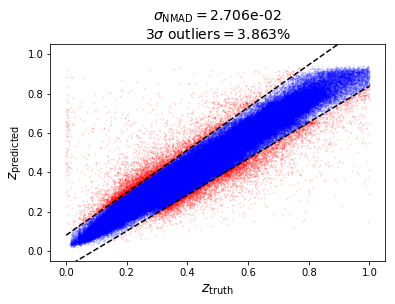

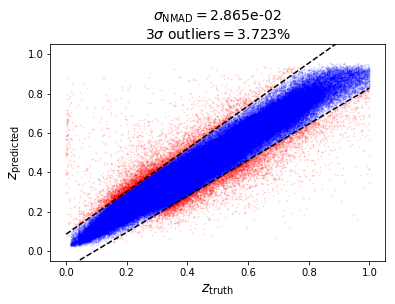

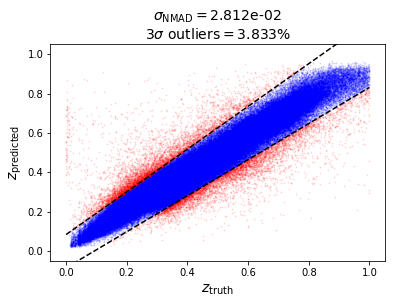

In [19]:
input_names = ["gminr", "rminz", "zminw1", "w1minw2", "gmag"]
target_name = "redshift"

funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func) for func in funcs]

def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

Running RFregressor took 95.89278054237366 seconds
Running KNNregressor took 12.307918310165405 seconds
Running KNN_dregressor took 23.21302628517151 seconds


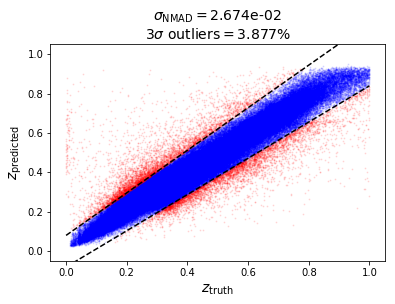

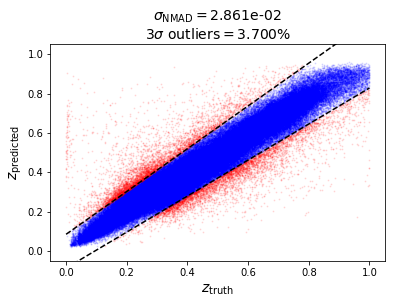

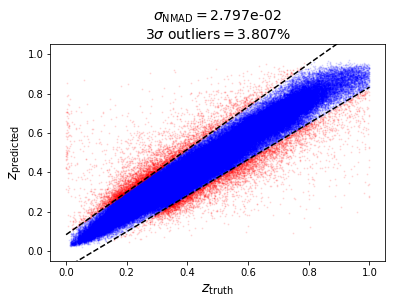

In [20]:
input_names = ["gminr", "rminz", "zminw1", "w1minw2", "gmag", "p_exp"]
target_name = "redshift"

funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func) for func in funcs]

def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

Running RFregressor took 88.39898228645325 seconds
Running KNNregressor took 13.181779384613037 seconds
Running KNN_dregressor took 16.232118606567383 seconds


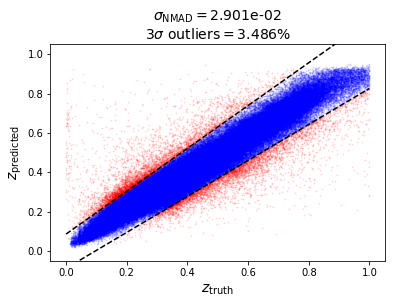

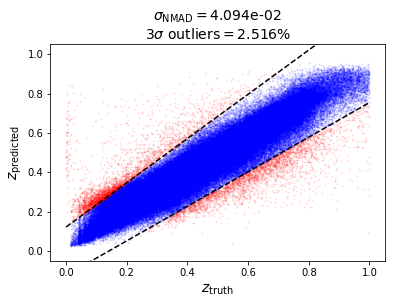

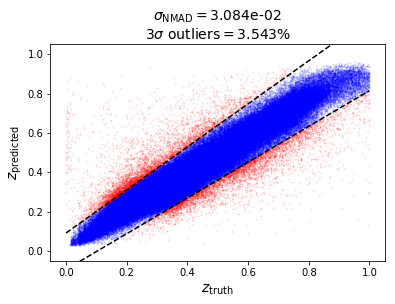

In [21]:
input_names = ["gmag", "rmag", "zmag", "w1mag", "w2mag", "logprob_exp"]
target_name = "redshift"

funcs = [ML.Regressors.RFregressor, ML.Regressors.KNNregressor, ML.Regressors.KNN_dregressor]
results = [predict(input_names, target_name, func) for func in funcs]

def f(z):
    ans = z.copy()
    ans[z < 0.5] = (1 - z[z < 0.5])**3/(1-.5)**3*.5
    return 1+z
f_label = lambda target: f"(1 + {target})"
target_label = "z"
for result in results:
    analysis = MLA.RegressionAnalyzer(result["predict"], result["test"], scale_as=f)
    plt.figure()
    analysis.plot_residuals(target_label, f_label, res=False)

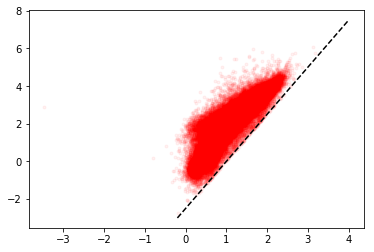

In [22]:
def plot_line(m,b):
    x = np.linspace(-.2,4)
    y = m*x + b
    plt.plot(x,y,"k--")
x,y = data["rmag"]-data["zmag"], data["rmag"]-data["w1mag"]
is_star = y < 2.5 * x - 2.5
plt.plot(x[is_star],y[is_star], "b.", alpha=.05)
plt.plot(x[~is_star],y[~is_star], "r.", alpha=.05)
plot_line(2.5,-2.5)


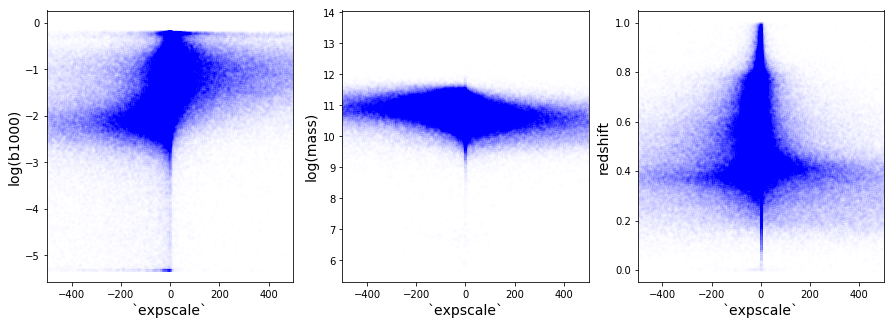

In [21]:
fig,axes = plt.subplots(figsize=(15,5), ncols=3)
[ax.set_xlim((-500,500)) for ax in axes]
[ax.set_xlabel("`expscale`", fontsize=14) for ax in axes]
axes[0].plot(data.expscale, np.log10(data.b1000), "b.", alpha=.005); axes[0].set_ylabel("log(b1000)", fontsize=14)
axes[1].plot(data.expscale, data.mass_ir, "b.", alpha=.005); axes[1].set_ylabel("log(mass)", fontsize=14)
axes[2].plot(data.expscale, data.redshift, "b.", alpha=.005); axes[2].set_ylabel("redshift", fontsize=14);

In [50]:
def p_to_pscale(p):
    return np.log10(p)-np.log10(1-p)
def pscale_to_p(pscale):
    pass

In [8]:
(np.isfinite(data.expscale)).sum()

498974